In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_dataset.csv')
df.head(2)

car_brand car_model  mileage_km  engine_size_cc            transmission  \
0       BMW        i3     51000.0           900.0  automatic transmission   
1   GENESIS       G80    120000.0          2497.0  automatic transmission   

  fuel_type steering_type drive_train no_of_seats no_of_doors  ... Air Bag  \
0    Hybrid           RHD       Other     4 Seats     5 Doors  ...       1   
1    Petrol           LHD         4WD     5 Seats     4 Doors  ...       1   

   Anti-Lock Brake System  Fog Lights  Power Windows  Alloy Wheels    year  \
0                       0           0              1             1  2016.0   
1                       0           0              1             1  2020.0   

   price(Ksh)  redundant_price_column  car_age  mileage_category  
0   2360003.0               2360003.0      9.0               Low  
1   5564201.0               5564201.0      5.0          Moderate  

[2 rows x 24 columns]

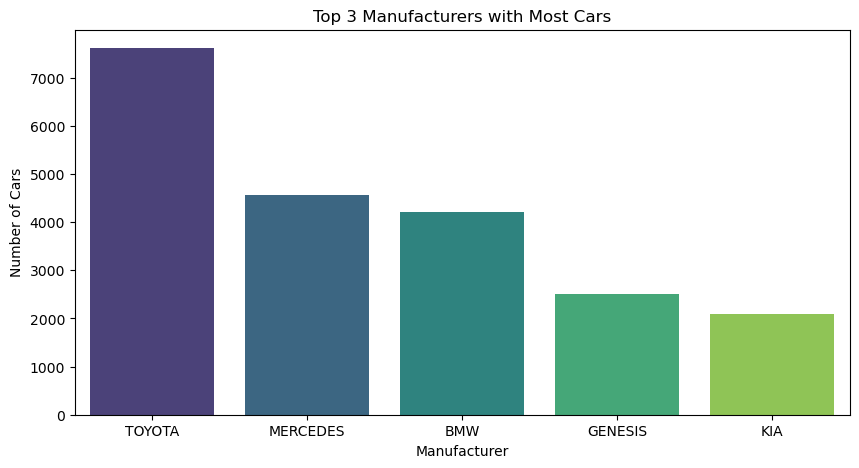

In [3]:
#Who are the top manufacturer with most cars? 

top_manufacturers = df['car_brand'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette='viridis')

plt.title('Top 3 Manufacturers with Most Cars')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')

plt.show() 

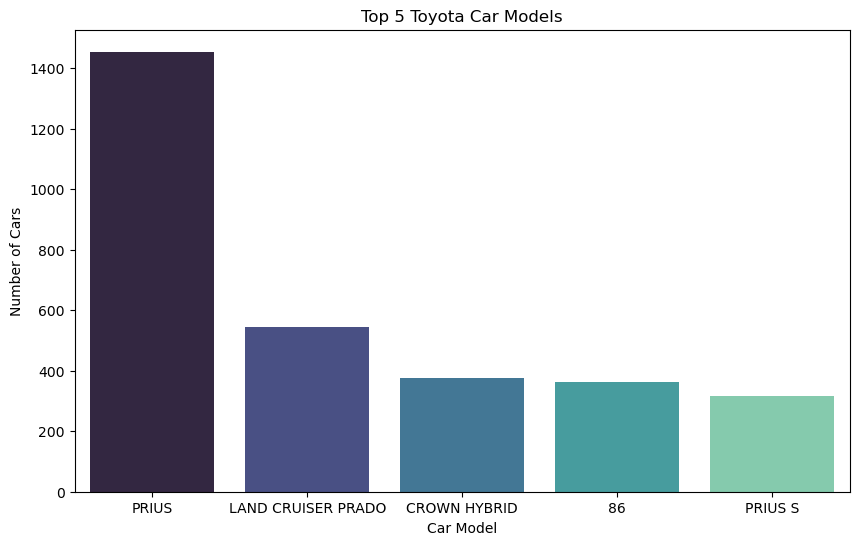

In [4]:
#Top 5 Toyota models


top_toyota_models = df[df['car_brand'] == 'TOYOTA']['car_model'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_toyota_models.index, y=top_toyota_models.values, palette='mako')

plt.title('Top 5 Toyota Car Models')
plt.xlabel('Car Model')
plt.ylabel('Number of Cars')

plt.show()

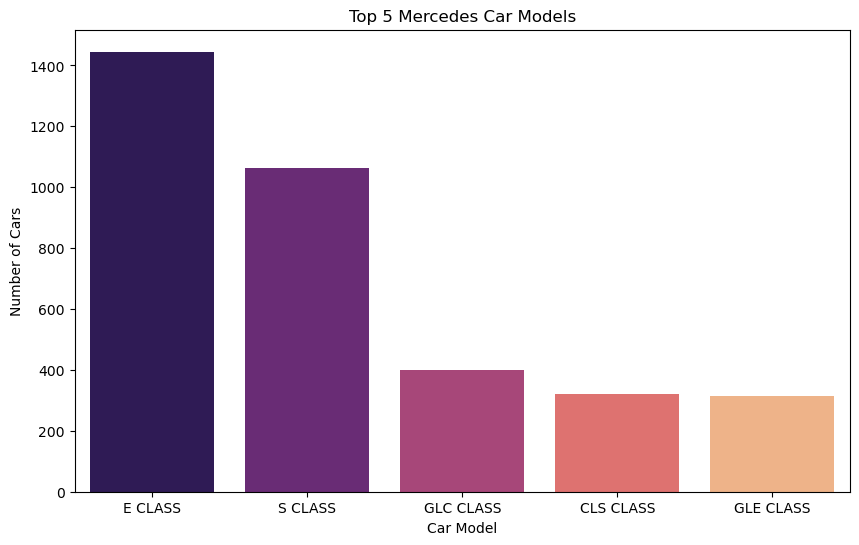

In [5]:
#What are the top 5 mercedes models?

top_mercedes_models = df[df['car_brand'] == 'MERCEDES']['car_model'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_mercedes_models.index, y=top_mercedes_models.values, palette='magma')

plt.title('Top 5 Mercedes Car Models')
plt.xlabel('Car Model')
plt.ylabel('Number of Cars')

plt.show()

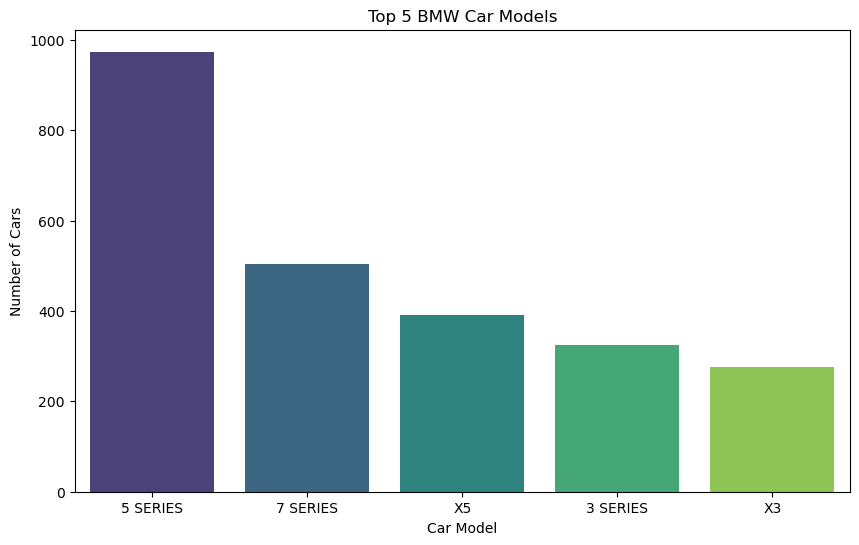

In [6]:
#What are the top 5 BMW models?

top_bmw_models = df[df['car_brand'] == 'BMW']['car_model'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_bmw_models.index, y=top_bmw_models.values, palette='viridis')

plt.title('Top 5 BMW Car Models')
plt.xlabel('Car Model')
plt.ylabel('Number of Cars')

plt.show()

Within the dataset, Toyota emerges as the predominant car manufacturer, boasting a substantial representation with 5851 instances. Following closely are Mercedes and BMW, commanding notable figures of 3462 and 3196 respectively. In the realm of Toyota models, the Prius, Landcruiser Prado, and Crown hybrid reign supreme as the top three most frequently encountered models.

Shifting focus to the Mercedes category within our dataset, the E, C, and GLC models stand out as the most prevalent choices among users and contributors. Meanwhile, in the domain of BMW, the 5 Series, 7 Series, and X5 emerge as the frontrunners, by  popularity among the various models associated with the BMW make.

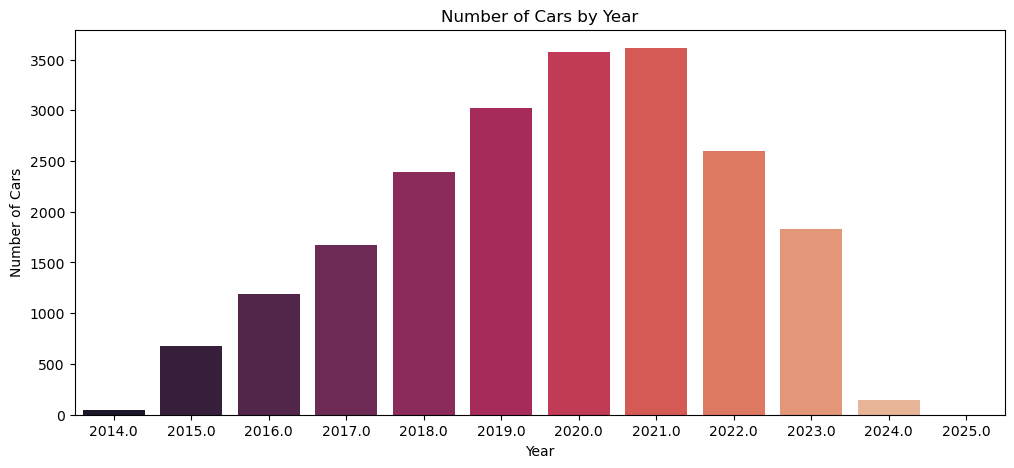

In [7]:
#Number of cars by year

plt.figure(figsize=(12, 5))
sns.countplot(x='year', data=df, palette='rocket')

plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')

plt.show()

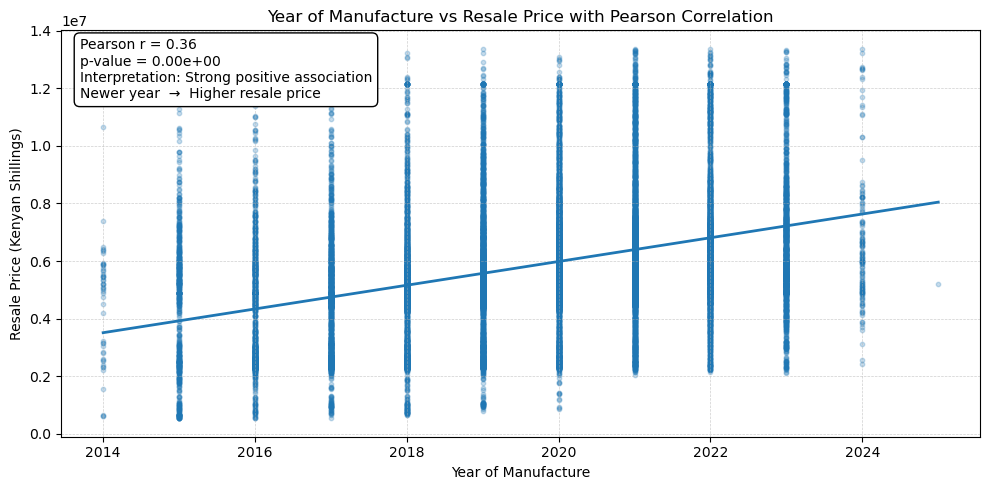

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

sub = df[['year', 'price(Ksh)']].dropna()

r, p = pearsonr(sub['year'].astype(float), sub['price(Ksh)'].astype(float))

x = sub['year'].values.astype(float)
y = sub['price(Ksh)'].values.astype(float)
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.25, s=10)

x_line = np.linspace(x.min(), x.max(), 500)
plt.plot(x_line, poly1d_fn(x_line), linewidth=2)

annotation_text = (
    f"Pearson r = {r:.2f}\n"
    f"p-value = {p:.2e}\n"
    "Interpretation: Strong positive association\n"
    "Newer year  →  Higher resale price"
)
plt.gca().annotate(
    annotation_text, xy=(0.02, 0.98), xycoords='axes fraction',
    ha='left', va='top',
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", lw=1)
)

plt.title("Year of Manufacture vs Resale Price with Pearson Correlation")
plt.xlabel("Year of Manufacture")
plt.ylabel("Resale Price (Kenyan Shillings)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


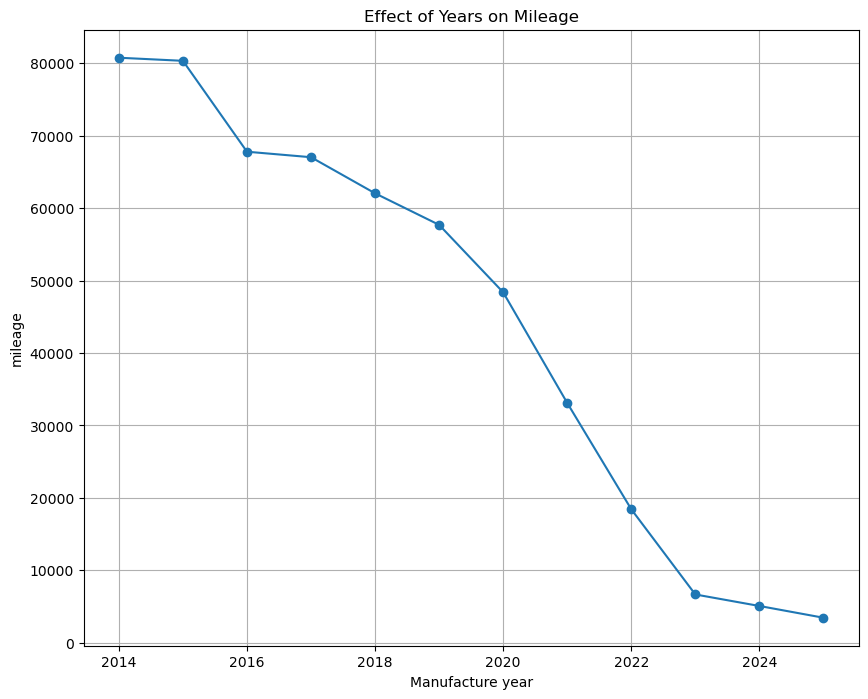

In [9]:
#What is the effect of years on the vehicles mileage

mean_mileage_by_year = df.groupby('year')['mileage_km'].mean()

plt.figure(figsize=(10, 8))

plt.plot(mean_mileage_by_year.index, mean_mileage_by_year.values, marker='o', linestyle='-')

plt.xlabel('Manufacture year')
plt.ylabel('mileage')
plt.title('Effect of Years on Mileage')
plt.grid(True)

plt.show()

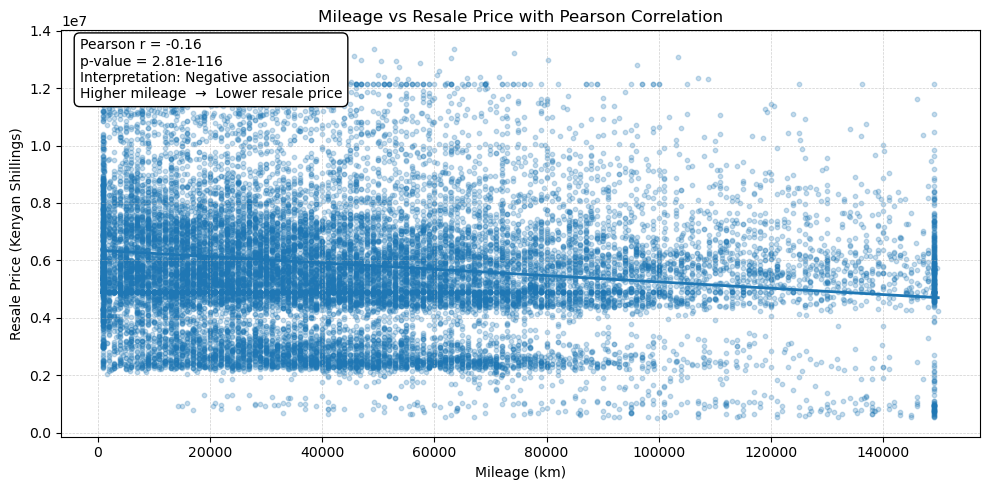

In [10]:
from scipy.stats import pearsonr

# Select and clean required columns
sub = df[["mileage_km", "price(Ksh)"]].dropna()
x = sub["mileage_km"].astype(float).values
y = sub["price(Ksh)"].astype(float).values

# Pearson correlation
r, p = pearsonr(x, y)

# Least-squares best-fit line
coef = np.polyfit(x, y, 1)
poly = np.poly1d(coef)
x_line = np.linspace(x.min(), x.max(), 500)

# Plot
plt.figure(figsize=(10,5))
plt.scatter(x, y, s=10, alpha=0.25)
plt.plot(x_line, poly(x_line), linewidth=2)

# Annotate with correlation results
note = (
    f"Pearson r = {r:.2f}\n"
    f"p-value = {p:.2e}\n"
    "Interpretation: Negative association\n"
    "Higher mileage  →  Lower resale price"
)
plt.gca().annotate(
    note, xy=(0.02, 0.98), xycoords="axes fraction",
    ha="left", va="top",
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", lw=1)
)

plt.title("Mileage vs Resale Price with Pearson Correlation")
plt.xlabel("Mileage (km)")
plt.ylabel("Resale Price (Kenyan Shillings)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


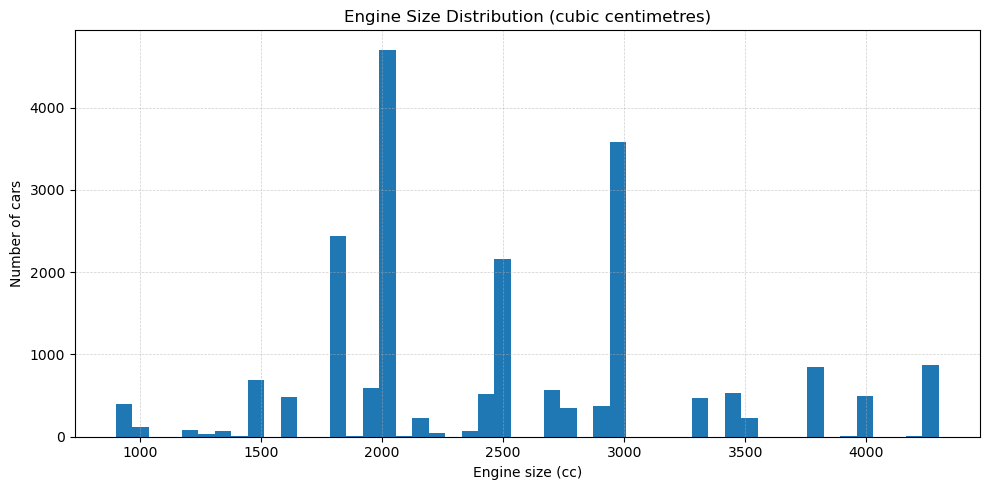

In [11]:
# Keep valid engine sizes
eng = df["engine_size_cc"].dropna()

plt.figure(figsize=(10, 5))
plt.hist(eng, bins=50)
plt.title("Engine Size Distribution (cubic centimetres)")
plt.xlabel("Engine size (cc)")
plt.ylabel("Number of cars")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


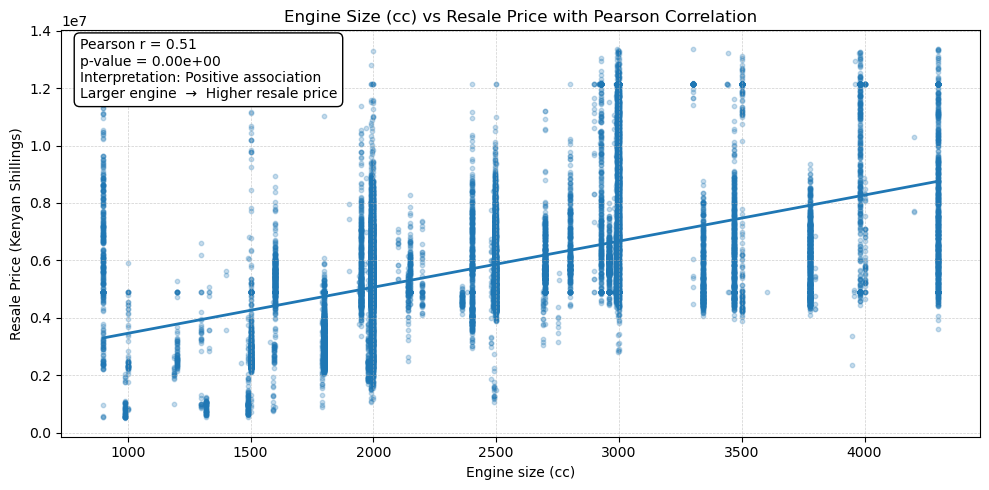

In [12]:
# Select and clean required columns
sub = df[["engine_size_cc", "price(Ksh)"]].dropna()
x = sub["engine_size_cc"].astype(float).values
y = sub["price(Ksh)"].astype(float).values

# Pearson correlation
r, p = pearsonr(x, y)

# Least-squares best-fit line
coef = np.polyfit(x, y, 1)
poly = np.poly1d(coef)
x_line = np.linspace(x.min(), x.max(), 500)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=10, alpha=0.25)
plt.plot(x_line, poly(x_line), linewidth=2)

# Annotate with correlation results
note = (
    f"Pearson r = {r:.2f}\n"
    f"p-value = {p:.2e}\n"
    "Interpretation: Positive association\n"
    "Larger engine  →  Higher resale price"
)
plt.gca().annotate(
    note, xy=(0.02, 0.98), xycoords="axes fraction",
    ha="left", va="top",
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", lw=1)
)

plt.title("Engine Size (cc) vs Resale Price with Pearson Correlation")
plt.xlabel("Engine size (cc)")
plt.ylabel("Resale Price (Kenyan Shillings)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


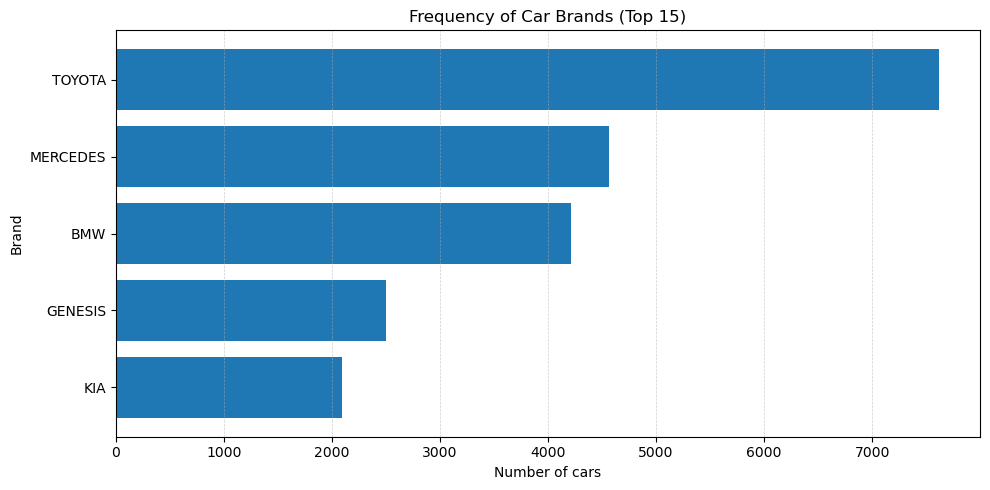

In [13]:
# Frequency per brand
brand_counts = (
    df["car_brand"]
    .dropna()
    .value_counts()
    .head(15)  # show top 15 brands
    .sort_values(ascending=True)  # sort for horizontal bar order
)

plt.figure(figsize=(10,5))
plt.barh(brand_counts.index.astype(str), brand_counts.values)
plt.title("Frequency of Car Brands (Top 15)")
plt.xlabel("Number of cars")
plt.ylabel("Brand")
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


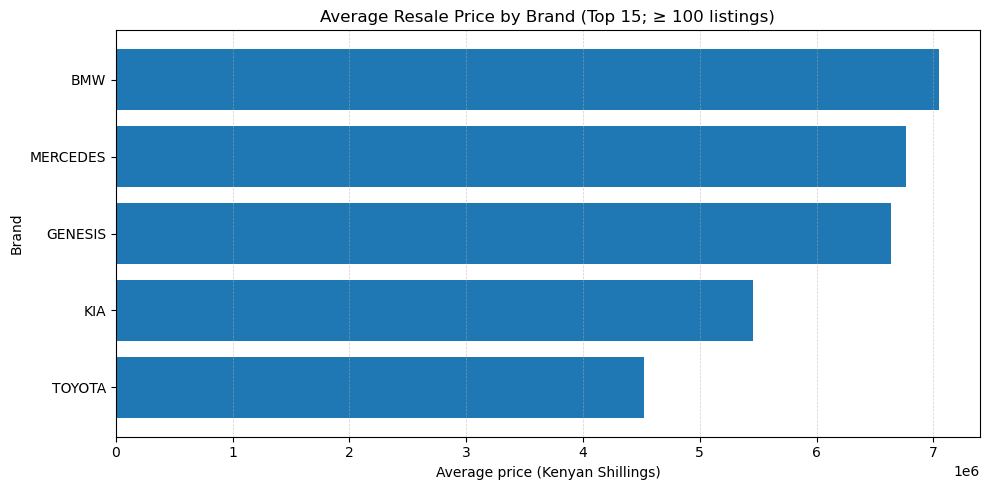

In [14]:
# Choose a minimum listing threshold per brand to avoid noisy averages
min_listings = 100  # adjust if needed

# Compute mean price per brand with filtering
brand_stats = (
    df[["car_brand", "price(Ksh)"]]
    .dropna()
    .groupby("car_brand")
    .agg(count=("price(Ksh)", "size"), avg_price=("price(Ksh)", "mean"))
    .query("count >= @min_listings")
    .sort_values("avg_price", ascending=False)
    .head(15)  # top 15 by average price
    .sort_values("avg_price", ascending=True)  # sort for horizontal bar order
)

plt.figure(figsize=(10, 5))
plt.barh(brand_stats.index.astype(str), brand_stats["avg_price"].values)
plt.title(f"Average Resale Price by Brand (Top 15; ≥ {min_listings} listings)")
plt.xlabel("Average price (Kenyan Shillings)")
plt.ylabel("Brand")
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


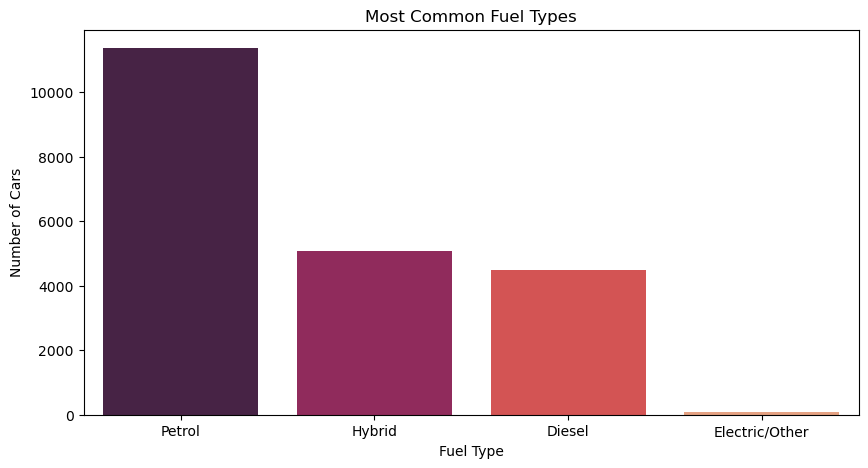

In [15]:
#What is the most common fuel types? 

top_fuel_types = df['fuel_type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=top_fuel_types.index, y=top_fuel_types.values, palette='rocket')

plt.title('Most Common Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')

plt.show()

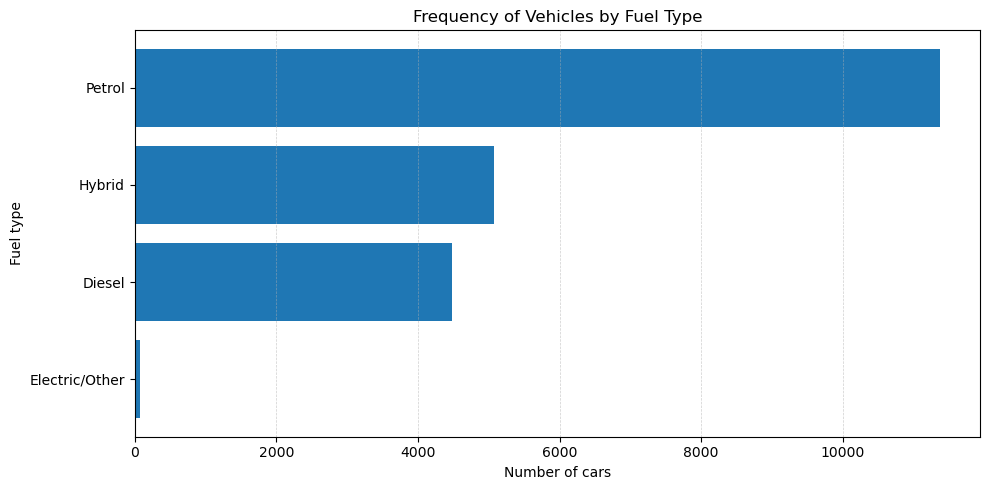

In [16]:
# Keep fuel type values and aggregate counts
fuel_counts = (
    df["fuel_type"]
    .dropna()
    .astype(str)
    .str.strip()
    .value_counts()
    .sort_values(ascending=True)   # sort for horizontal bar order
)

plt.figure(figsize=(10,5))
plt.barh(fuel_counts.index, fuel_counts.values)
plt.title("Frequency of Vehicles by Fuel Type")
plt.xlabel("Number of cars")
plt.ylabel("Fuel type")
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


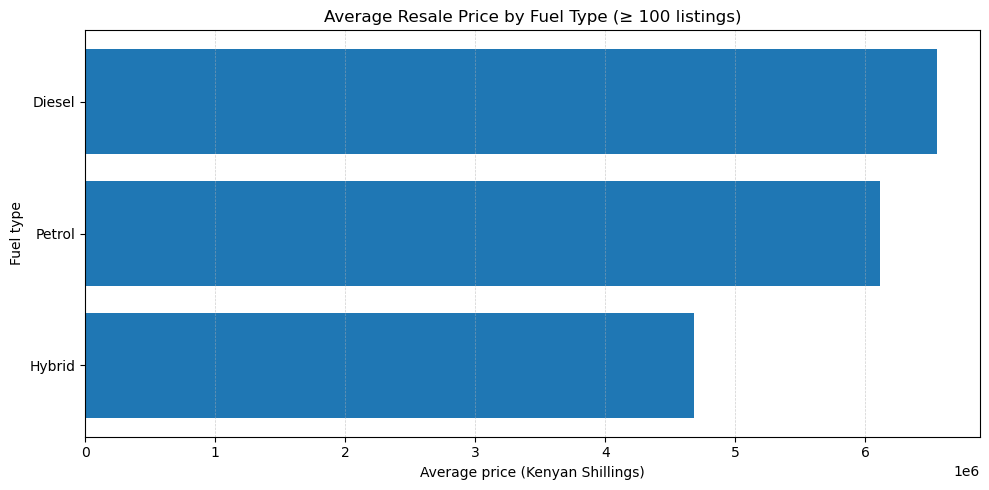

In [17]:
# Choose a minimum listing threshold per fuel type to avoid noisy averages
min_listings = 100  # adjust if needed

# Compute mean price per fuel type with filtering
fuel_stats = (
    df[["fuel_type", "price(Ksh)"]]
    .dropna()
    .assign(fuel_type=lambda d: d["fuel_type"].astype(str).str.strip())
    .groupby("fuel_type", as_index=True)
    .agg(count=("price(Ksh)", "size"), avg_price=("price(Ksh)", "mean"))
    .query("count >= @min_listings")
    .sort_values("avg_price", ascending=True)  # sort for horizontal bar order
)

plt.figure(figsize=(10, 5))
plt.barh(fuel_stats.index, fuel_stats["avg_price"].values)
plt.title(f"Average Resale Price by Fuel Type (≥ {min_listings} listings)")
plt.xlabel("Average price (Kenyan Shillings)")
plt.ylabel("Fuel type")
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


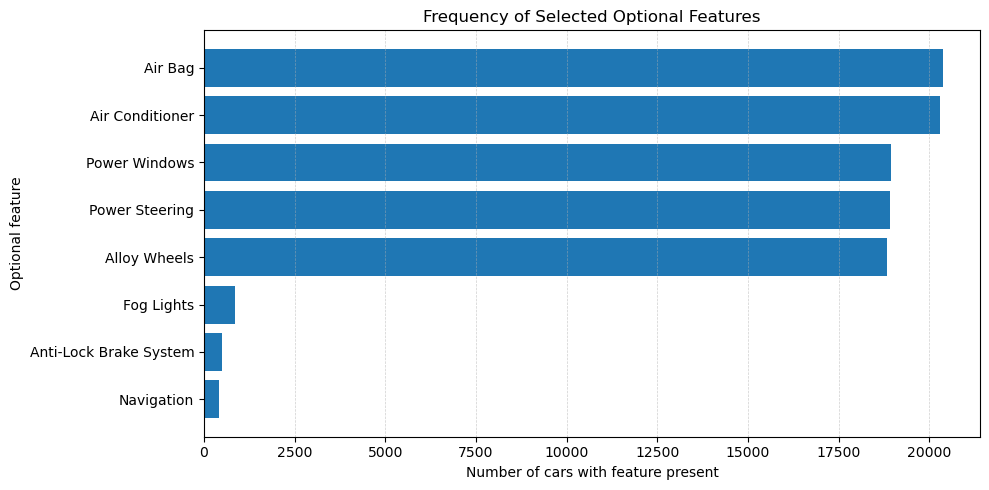

In [18]:
# Columns to analyze (rename here if your columns differ)
feature_cols = [
    "Power Steering",
    "Air Conditioner",
    "Navigation",
    "Air Bag",
    "Anti-Lock Brake System",
    "Fog Lights",
    "Power Windows",
    "Alloy Wheels",
]

# Robust conversion to binary 0/1 for each feature
def to_binary(v):
    if pd.isna(v):
        return 0
    if isinstance(v, (int, float, np.integer, np.floating)):
        return int(v != 0)
    s = str(v).strip().lower()
    return int(s in {"1","y","yes","true","t","present","available"})

feat_bin = df[feature_cols].applymap(to_binary)

# Count how many cars have the feature (value == 1)
counts = feat_bin.sum().sort_values(ascending=True)

# Plot (horizontal bar)
plt.figure(figsize=(10, 5))
plt.barh(counts.index, counts.values)
plt.title("Frequency of Selected Optional Features")
plt.xlabel("Number of cars with feature present")
plt.ylabel("Optional feature")
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


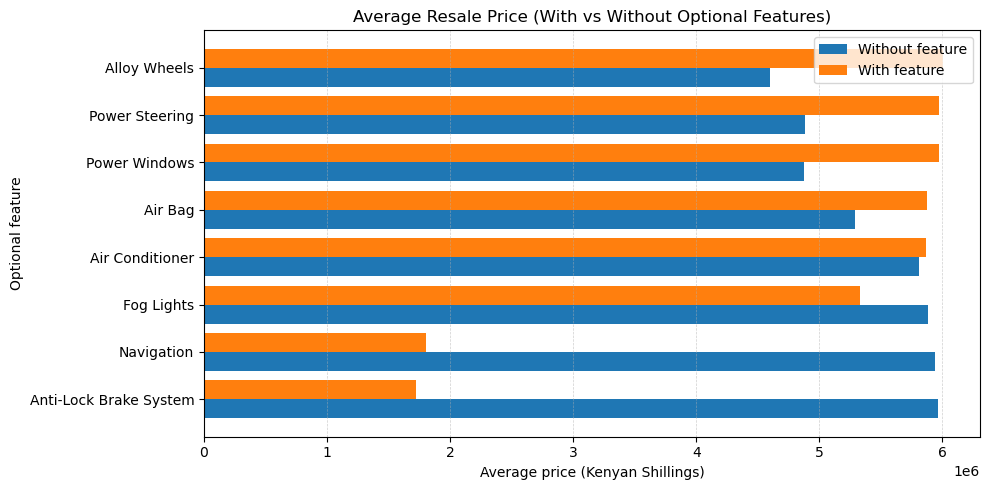

In [19]:
feature_cols = [
    "Power Steering",
    "Air Conditioner",
    "Navigation",
    "Air Bag",
    "Anti-Lock Brake System",
    "Fog Lights",
    "Power Windows",
    "Alloy Wheels",
]

def to_binary(v):
    if pd.isna(v):
        return 0
    if isinstance(v, (int, float, np.integer, np.floating)):
        return int(v != 0)
    s = str(v).strip().lower()
    return int(s in {"1","y","yes","true","t","present","available"})

feat_bin = df[feature_cols].applymap(to_binary)

# Make a tidy table of average price with vs without for each feature
price_col = "price(Ksh)"
stats = []
for col in feature_cols:
    sub = pd.DataFrame({
        "has_feature": feat_bin[col].values,
        "price": df[price_col].values
    }).dropna()
    with_feat = sub.loc[sub["has_feature"] == 1, "price"].mean()
    without_feat = sub.loc[sub["has_feature"] == 0, "price"].mean()
    stats.append((col, without_feat, with_feat))

price_stats = pd.DataFrame(stats, columns=["feature", "without", "with"])
price_stats = price_stats.set_index("feature").sort_values("with", ascending=True)

# Plot grouped bars (one chart; two bars per feature)
y = np.arange(len(price_stats))
h = 0.4

plt.figure(figsize=(10,5))
plt.barh(y - h/2, price_stats["without"].values, height=h, label="Without feature")
plt.barh(y + h/2, price_stats["with"].values, height=h, label="With feature")
plt.yticks(y, price_stats.index)
plt.title("Average Resale Price (With vs Without Optional Features)")
plt.xlabel("Average price (Kenyan Shillings)")
plt.ylabel("Optional feature")
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


The predominant trend within our dataset reveals that a significant portion of the vehicles were produced in 2021, closely followed by those manufactured in 2020, with 2022 trailing behind. Conversely, the lowest count pertains to vehicles manufactured in 2024. Notably, vehicles manufactured in earlier years exhibit a comparatively higher mileage when compared to their more recent counterparts.

Shifting our attention to the fuel types propelling these vehicles, petrol emerges as the dominant choice, with hybrid vehicles occupying the second position. Meanwhile, the category of Electric and other alternative fuels represents the least utilized, as visually depicted in the accompanying graph. This distribution sheds light on the prevalent choices of fuel sources among the vehicles encompassed in our dataset.


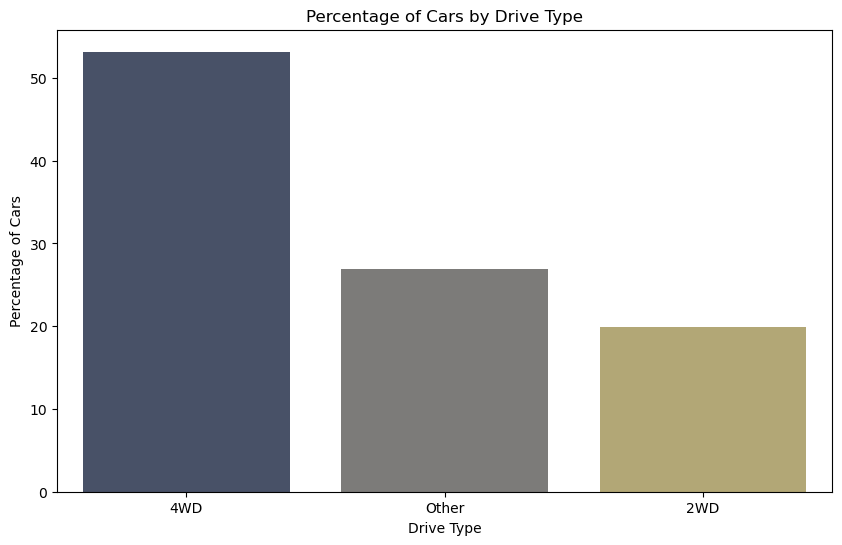

In [20]:
#What's the percentage for each of the car drive type? 

#define the drive type percentage
drive_type_percentage = df['drive_train'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=drive_type_percentage.index, y=drive_type_percentage.values, palette='cividis')

plt.title('Percentage of Cars by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Percentage of Cars')

plt.show()

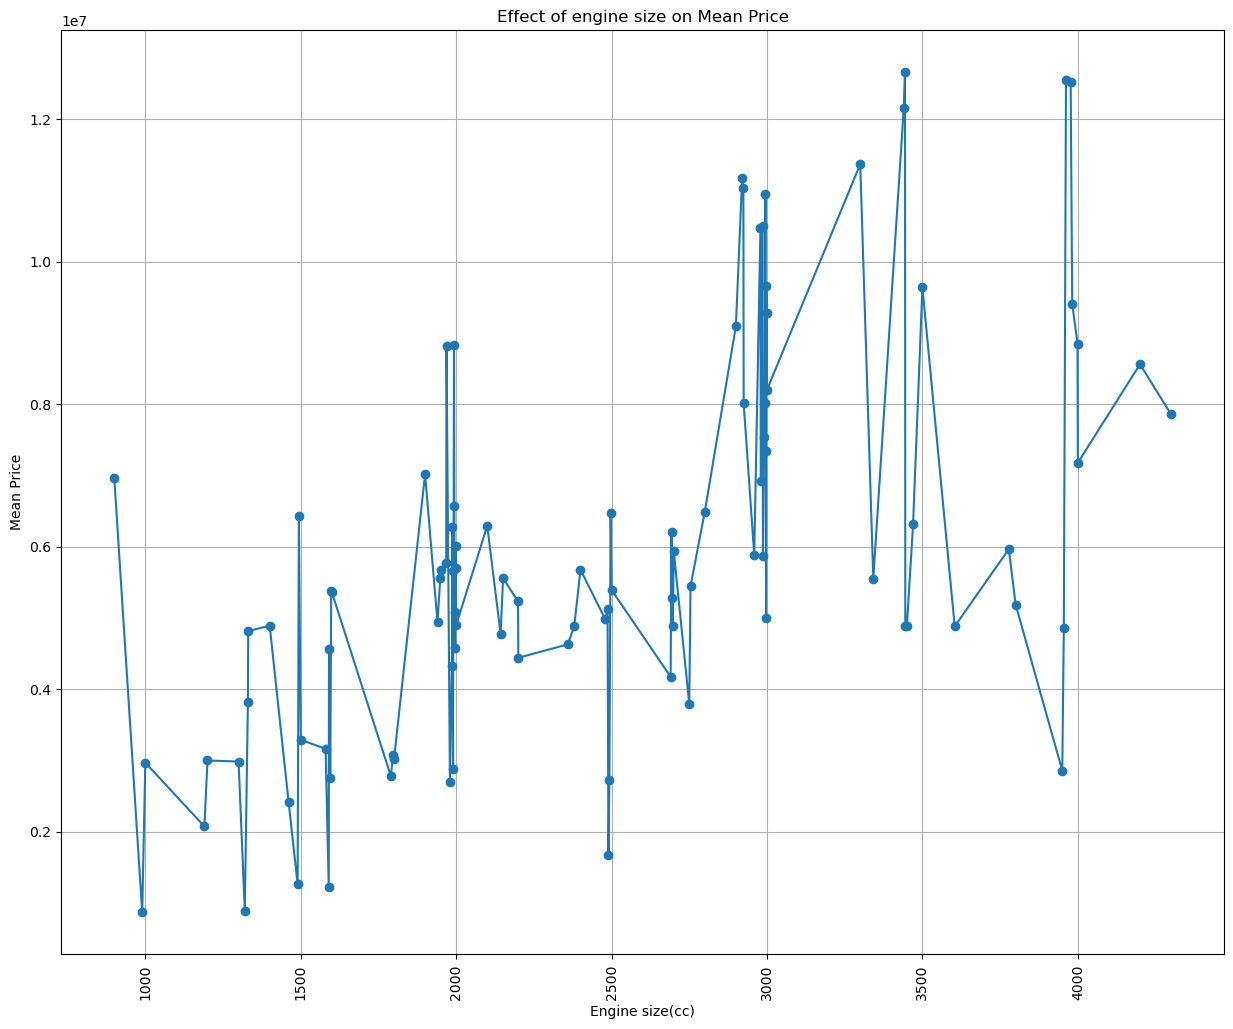

In [21]:
# What is the mean price for each mileage
mean_price_by_cc = df.groupby('engine_size_cc')['price(Ksh)'].mean()

plt.figure(figsize=(15, 12))

plt.plot(mean_price_by_cc.index, mean_price_by_cc.values, marker='o', linestyle='-')

plt.xticks(rotation=90)
plt.xlabel('Engine size(cc)')
plt.ylabel('Mean Price')
plt.title('Effect of engine size on Mean Price')
plt.grid(True)

# Display the plot
plt.show()

The predominant segment in our dataset is occupied by four-wheel-drive vehicles, showcasing a substantial majority. Following closely in representation are vehicles with alternative drive types, whereas the category with the least number of entries comprises two-wheel-drive vehicles. 

Upon scrutinizing the impact of engine size on the average price, a discernible trend emerged. Vehicles endowed with smaller engine sizes exhibited a tendency to be more affordable compared to their counterparts with higher engine size ratings. Notably, a noteworthy observation was made for vehicles falling within the engine size range of approximately 2200cc to 4000cc, which exhibited a trend of commanding relatively higher prices.

Among the various car brands, Lamborghini, Ferrari, Rolls-Royce, FAW, and Aston Martin stood out with the highest mean prices, signifying a premium associated with these prestigious brands. Conversely, Daihatsu, Chery, and Gelly emerged with the lowest mean prices, portraying a more economical choice within the spectrum of available options.
This analysis sheds light on the intricate relationship between engine size and pricing, offering valuable insights into the market dynamics and preferences associated with different car brands.

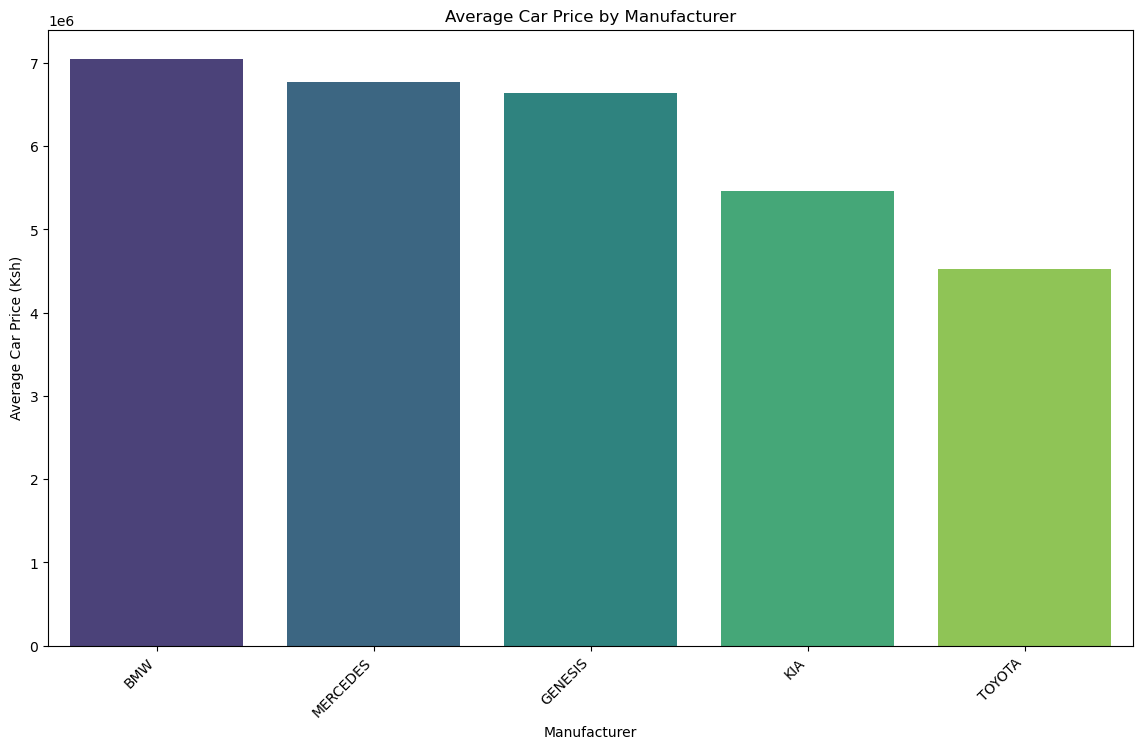

In [22]:
#What’s average price for each manufacture? 

avg_price_manufacturer = df.groupby('car_brand')['price(Ksh)'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=avg_price_manufacturer.index, y=avg_price_manufacturer.values, palette='viridis')

plt.title('Average Car Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Car Price (Ksh)')

#Rotate car make for readability
plt.xticks(rotation=45, ha='right')

plt.show()

C:\Users\1030G2\AppData\Local\Temp\ipykernel_14664\2754274607.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='transmission', y='price(Ksh)', data=df, palette='coolwarm', ci=None)


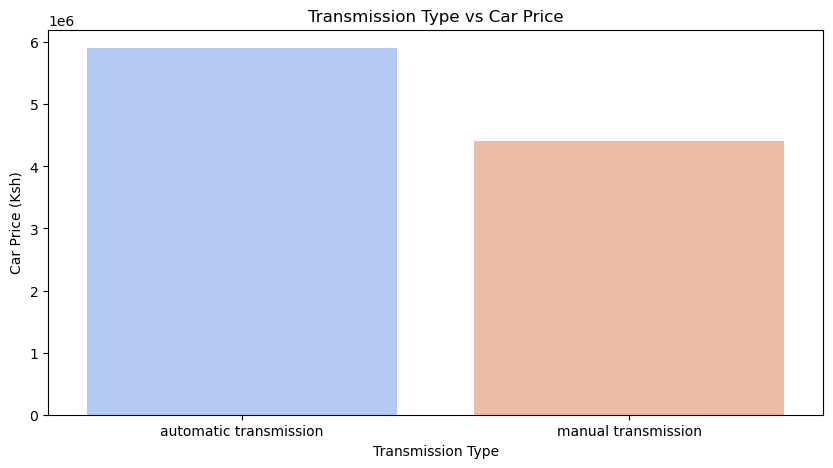

In [23]:
#Does the transmission affect car price? 

plt.figure(figsize=(10, 5))
sns.barplot(x='transmission', y='price(Ksh)', data=df, palette='coolwarm', ci=None)

plt.title('Transmission Type vs Car Price')
plt.xlabel('Transmission Type')
plt.ylabel('Car Price (Ksh)')

plt.show()

The mean price for vehicles equipped with automatic transmission surpassed that of their manual counterparts, indicating a premium associated with the convenience and ease offered by automatic transmissions.

Additionally, vehicles boasting lower mileage exhibited a higher mean price, emphasizing the positive correlation between lower usage and increased market value. Conversely, vehicles with higher mileages tended to have a comparatively lower mean price, underscoring the influence of accumulated mileage on pricing, potentially reflecting the wear and tear associated with extended usage.

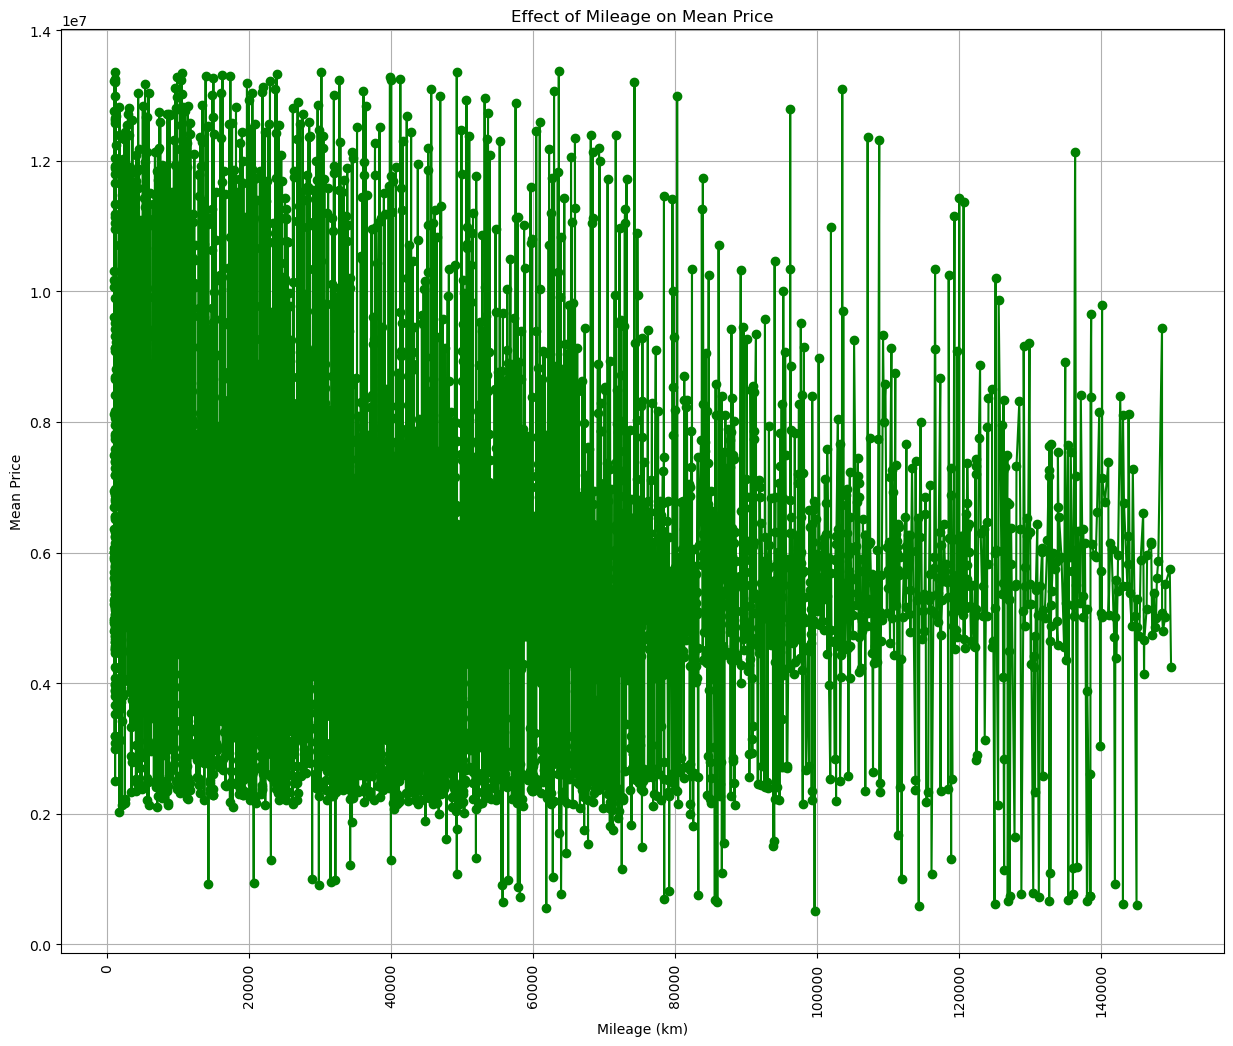

In [24]:
#Effect of mileage on price


# Calculating the mean price for each mileage
mean_price_by_mileage = df.groupby('mileage_km')['price(Ksh)'].mean()

plt.figure(figsize=(15, 12))

# Plotting the line graph
plt.plot(mean_price_by_mileage.index, mean_price_by_mileage.values, marker='o', color='green', linestyle='-')

plt.xticks(rotation=90)
# Adding labels and title
plt.xlabel('Mileage (km)')
plt.ylabel('Mean Price')
plt.title('Effect of Mileage on Mean Price')
plt.grid(True)

# Display the plot
plt.show()

C:\Users\1030G2\AppData\Local\Temp\ipykernel_14664\678323466.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


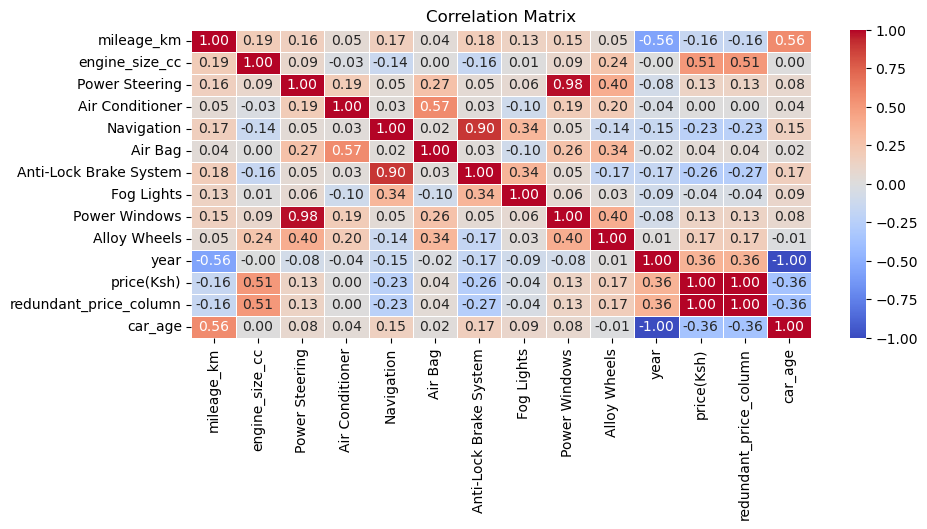

In [25]:
#Correlation matrix

correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

The heatmap visually represents the interrelationships between various features in our dataset. Focusing on our target feature, which is the price(Ksh), it becomes evident that engine_size_cc exhibits the highest positive correlation. This indicates a significant influence of the engine capacity on the overall price of a vehicle. On the contrary, features such as the Anti-Lock Brake System and Navigation demonstrate the least impact on the pricing structure, as reflected by their lower correlation coefficients with the target variable.

### FINDINGS

**Popularity Of Models**

 In the Toyota category, Prius, Landcruiser Prado, and Crown hybrid are the top three most frequently encountered models.

 For Mercedes, the E, C, and GLC models are prevalent.

 Among BMW models, the 5 Series, 7 Series, and X5 stand out.

**Year of Manufacture and mileage**
Most vehicles  were manufactured in 2021, followed by 2020 and 2022. Fewer vehicles were manufactured in 2024.

Vehicles manufactured in earlier years tend to have higher mileage compared to recent years.

**Fuel Types**

Petrol-powered vehicles are predominant, followed by hybrid vehicles. Electric and other fuel types are the least popular.

**Transmission and Mileage Impact on Price**

Vehicles with automatic transmission generally have higher mean prices compared to those with manual transmission.

Vehicles with lower mileage tend to have higher mean prices, while those with higher mileage are relatively cheaper.

**Engine Size and Price**

Vehicles with lower engine sizes are relatively cheaper, while those with engine sizes around 2200cc to 4000cc have higher prices.

**Price Distribution by Manufacturer**

Lamborghini, Ferrari, Rolls Royce, FAW, and Aston Martin have the highest mean prices, while Daihatsu, Chery, and Gelly have the lowest mean prices.




